# imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
from PIL import Image
import pandas as pd 
import random
import datetime
import pickle 
import struct
# Reading from idx file function code snippet is taken from https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40#file-mnist-py
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


from IPython.core.interactiveshell import InteractiveShell

# Classif.DATASET : Fashion MNIST 

In [14]:
mnist_data_folder = './../Data/Fashion_MNIST/'
mnist_train_images_file =  mnist_data_folder + f'train-images-idx3-ubyte'
mnist_train_labels_file =  mnist_data_folder + f'train-labels-idx1-ubyte'
mnist_test_images_file =  mnist_data_folder + f't10k-images-idx3-ubyte'
mnist_test_labels_file =  mnist_data_folder + f't10k-labels-idx1-ubyte'

mnist_train_images = read_idx(mnist_train_images_file)
mnist_train_labels = read_idx(mnist_train_labels_file)
mnist_test_images = read_idx(mnist_test_images_file)
mnist_test_labels = read_idx(mnist_test_labels_file)

mnist_train_images.shape ,mnist_train_labels.shape,mnist_test_images.shape ,mnist_test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

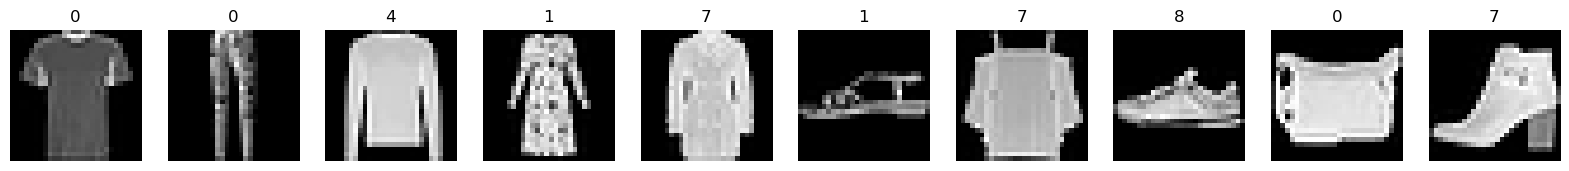

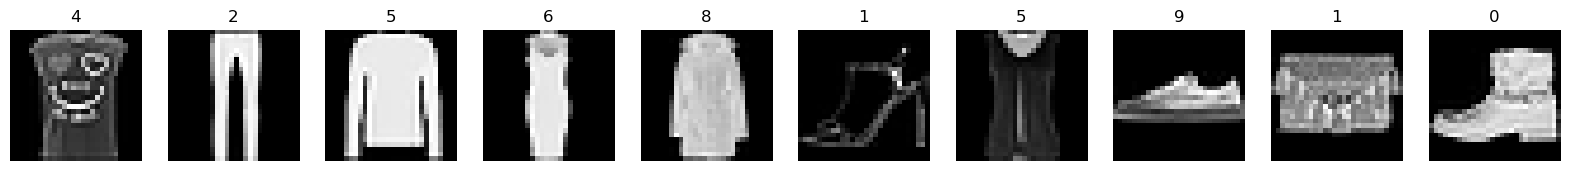

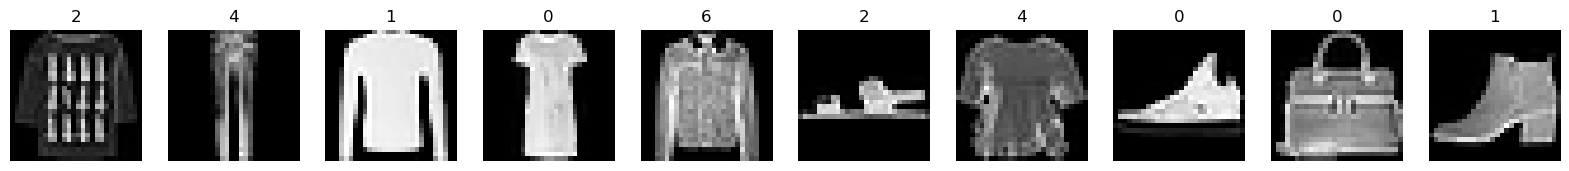

In [15]:
def plot_all_labels(images,labels):
    fig = plt.figure(figsize=(20,2))
    for i in range(10):
        ax = fig.add_subplot(1, 10, i+1)
        imgs = images[labels == i]
        img_i = np.random.randint(0, imgs.shape[0])
        ax.imshow(imgs[img_i], cmap='gray')
        ax.set_title(f'{labels[img_i]}')
        ax.axis('off')
    
plot_all_labels(mnist_train_images,mnist_train_labels)
plot_all_labels(mnist_train_images,mnist_train_labels)
plot_all_labels(mnist_train_images,mnist_train_labels)

In [16]:
mnist_train_images_flat = mnist_train_images.reshape(-1, 28 * 28)
mnist_test_images_flat = mnist_test_images.reshape(-1, 28 * 28)
X_train = mnist_train_images_flat
y_train = mnist_train_labels
X_test = mnist_test_images_flat
y_test = mnist_test_labels
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

### Quick Test with KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")
print(f'Test Error Rate : {(1 - accuracy)*100:.2f}%')

KNeighborsClassifier(n_neighbors=3)

Accuracy : 0.8541
Test Error Rate : 14.59%


In [18]:
def compare_with_images(model, X_test, y_test, mnist_test , lables = 10):
    fig = plt.figure(figsize=(20,2))
    for i in range(10):
        ax = fig.add_subplot(1, lables, i+1)
        imgs = mnist_test[y_test == i]
        pred = X_test[y_test == i]
        lbls = y_test[y_test == i]
        img_i = np.random.randint(0, imgs.shape[0])
        model_pred = model.predict(pred[img_i].reshape(1,-1))
        ax.imshow(imgs[img_i], cmap='gray')
        if model_pred[0] == lbls[img_i]:
            ax.set_title(f'Actual :{lbls[img_i]} \nPredict :{int(model_pred[0])} \nimage:', color='green')
        else:
            ax.set_title(f'Actual :{lbls[img_i]} \nPredict :{int(model_pred[0])} $\\times$ \nimage:', color='red')
        # ax.set_title(f'Actual :{lbls[img_i]} \nPredict :{int(model_pred[0])}\nReconstructing:')
        ax.axis('off')

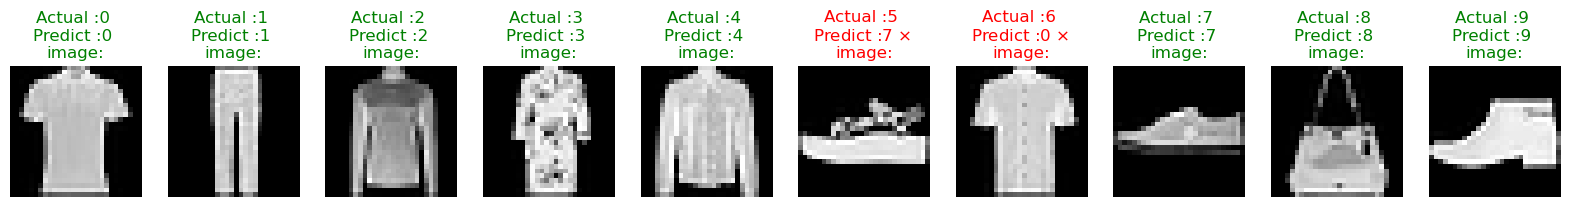

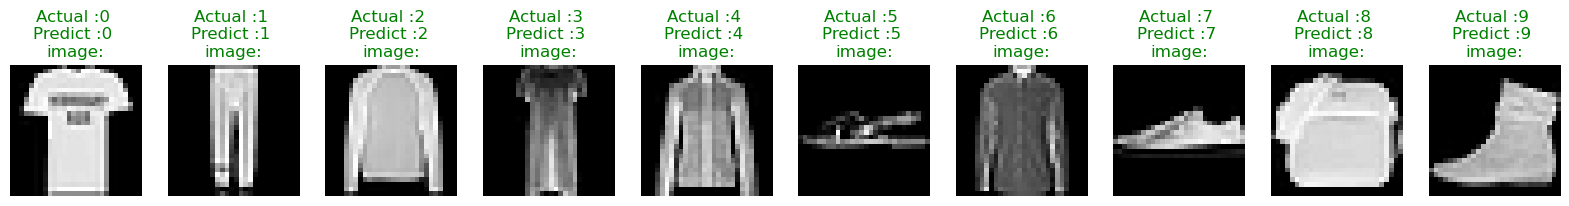

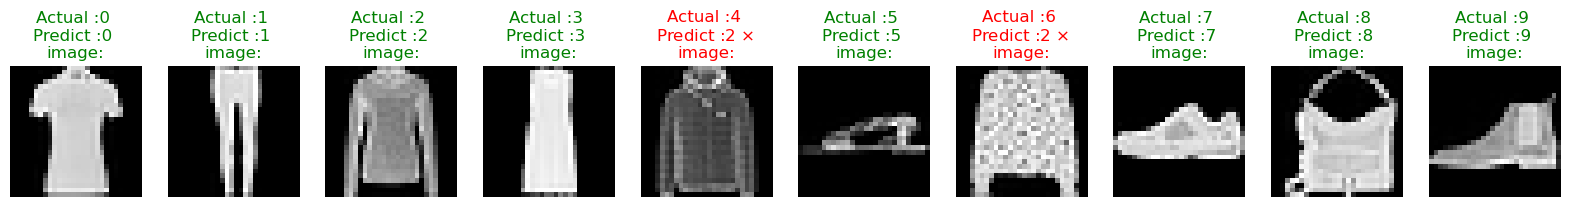

In [19]:
compare_with_images(knn, X_test, y_test, mnist_test_images)
compare_with_images(knn, X_test, y_test, mnist_test_images)
compare_with_images(knn, X_test, y_test, mnist_test_images)

# Classif.DATASET : CIFAR - 10 (COLOUR)

In [ ]:
cifar_data_folder = './../Data/cifar/cifar-10/'

cifar_train_batch_1_file = cifar_data_folder + 'data_batch_1'
cifar_train_batch_2_file = cifar_data_folder + 'data_batch_2'
cifar_train_batch_3_file = cifar_data_folder + 'data_batch_3'
cifar_train_batch_4_file = cifar_data_folder + 'data_batch_4'
cifar_train_batch_5_file = cifar_data_folder + 'data_batch_5'
cifar_test_file = cifar_data_folder + 'test_batch' 


cifar_batch_1 = unpickle(cifar_train_batch_1_file) 
cifar_batch_2 = unpickle(cifar_train_batch_2_file)
cifar_batch_3 = unpickle(cifar_train_batch_3_file)
cifar_batch_4 = unpickle(cifar_train_batch_4_file)
cifar_batch_5 = unpickle(cifar_train_batch_5_file)
cifar_batch_test = unpickle(cifar_test_file)

cifar_batch_1_data = cifar_batch_1[b'data']
cifar_batch_1_labels = np.array(cifar_batch_1[b'labels'])
cifar_batch_2_data = cifar_batch_2[b'data']
cifar_batch_2_labels = np.array(cifar_batch_2[b'labels'])
cifar_batch_3_data = cifar_batch_3[b'data']
cifar_batch_3_labels = np.array(cifar_batch_3[b'labels'])
cifar_batch_4_data = cifar_batch_4[b'data']
cifar_batch_4_labels = np.array(cifar_batch_4[b'labels'])
cifar_batch_5_data = cifar_batch_5[b'data']
cifar_batch_5_labels = np.array(cifar_batch_5[b'labels'])

cifar_batch_test_data = cifar_batch_test[b'data']
cifar_batch_test_labels = np.array(cifar_batch_test[b'labels'])

cifar_train_data = np.vstack([cifar_batch_1_data, cifar_batch_2_data, cifar_batch_3_data,cifar_batch_4_data, cifar_batch_5_data]).reshape(-1,32*32*3)
cifar_train_labels = np.hstack([cifar_batch_1_labels, cifar_batch_2_labels, cifar_batch_3_labels,cifar_batch_4_labels, cifar_batch_5_labels])

cifar_test_data = cifar_batch_test_data.reshape(-1,32*32*3)
cifar_test_labels = cifar_batch_test_labels

cifar_label_dict = {}
for idx, label_number in enumerate(cifar_batch_test[b'labels']):
	label_name = cifar_batch_test[b'filenames'][idx].decode('utf-8').split('_')[0]
	if label_number not in cifar_label_dict:
		cifar_label_dict[label_number] = label_name

cifar_train_data.shape , cifar_train_labels.shape, cifar_test_data.shape, cifar_test_labels.shape

((50000, 3072), (50000,), (10000, 3072), (10000,))

In [45]:
cifar_label_dict = dict(sorted(cifar_label_dict.items()))
cifar_label_dict

{0: 'jetliner',
 1: 'shooting',
 2: 'gamecock',
 3: 'domestic',
 4: 'wapiti',
 5: 'toy',
 6: 'green',
 7: 'lippizan',
 8: 'hydrofoil',
 9: 'dustcart'}

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"  # Options: 'last', 'all', 'last_expr'

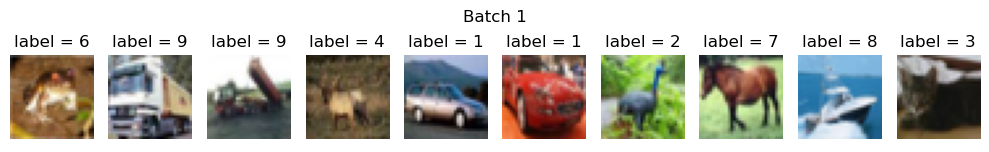

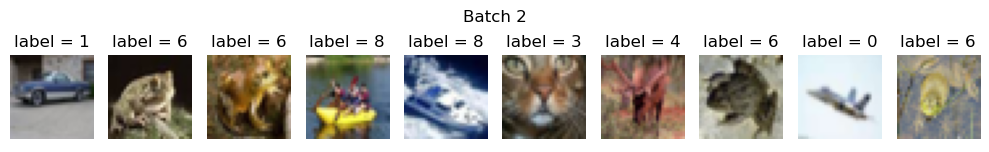

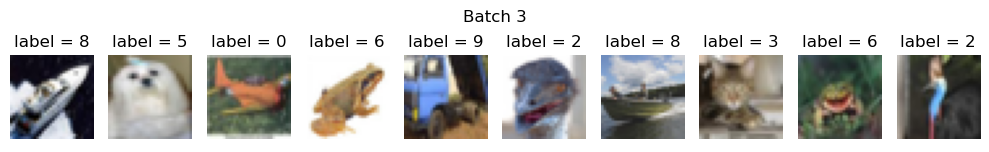

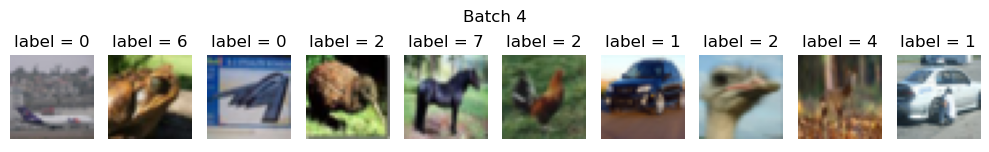

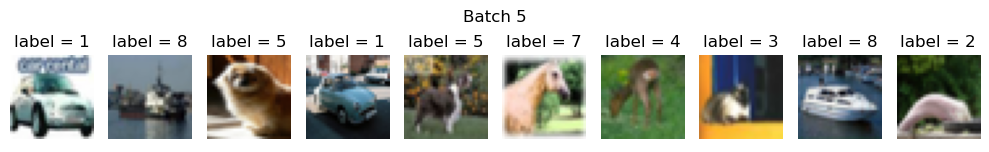

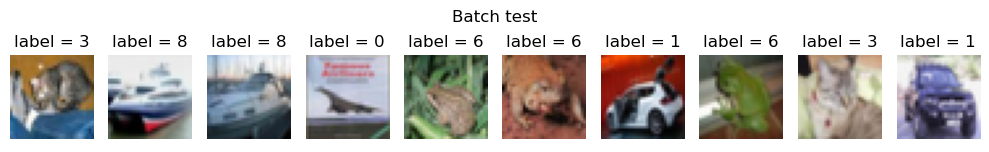

{3: 'domestic', 8: 'hydrofoil', 0: 'jetliner', 6: 'green', 1: 'shooting', 9: 'dustcart', 5: 'toy', 7: 'lippizan', 4: 'wapiti', 2: 'gamecock'}


In [7]:
datasets = {
	'Batch 1':(cifar_batch_1_data,cifar_batch_1_labels),
	'Batch 2':(cifar_batch_2_data,cifar_batch_2_labels),
	'Batch 3':(cifar_batch_3_data,cifar_batch_3_labels),
	'Batch 4':(cifar_batch_4_data,cifar_batch_4_labels),
	'Batch 5':(cifar_batch_5_data,cifar_batch_5_labels),
	'Batch test':(cifar_batch_test_data,cifar_batch_test_labels)
}

for batch, data in datasets.items():
	fig, ax = plt.subplots(figsize = (10,1.5))
	plt.axis('off')
	for i in range(1, 11):
		plt.subplot(1, 10, i)
		plt.axis('off')
		plt.title(f'label = {data[1][i-1]}')
		plt.imshow(data[0][i-1].reshape(3, 32, 32).transpose(1,2, 0), cmap='gray')
	fig.suptitle(f'{batch}')
	plt.tight_layout()
	plt.show()
print(cifar_label_dict)

### Simple Linear Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(cifar_train_data, cifar_train_labels)
y_pred = knn.predict(cifar_test_data)


In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(cifar_test_labels, y_pred)
print(f"Accuracy : {accuracy:.4f}")
print(f'Test Error Rate : {(1 - accuracy)*100:.2f}%')

Accuracy : 0.3398
Test Error Rate : 66.02%


In [27]:
W = np.random.rand(cifar_train_data.shape[1], 10) 
b = np.random.rand(1,10) 

linear_model = cifar_train_data @ W + b 
linear_model.shape

(50000, 10)

In [28]:
y_pred = np.argmax(linear_model , axis = 1)
y_pred.shape

(50000,)

In [29]:
def loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2) 
loss(y_pred, cifar_train_labels)

11.23514

In [30]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True) 

y_pred2 = np.argmax(softmax(linear_model), axis = 1)

loss(y_pred2, cifar_train_labels)

C:\Users\myalla\AppData\Local\Temp\ipykernel_20284\1237912319.py:2: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
C:\Users\myalla\AppData\Local\Temp\ipykernel_20284\1237912319.py:3: RuntimeWarning: invalid value encountered in divide
  return exp_x / np.sum(exp_x, axis=1, keepdims=True)


28.5

In [31]:
accuracy_score(y_pred2, cifar_train_labels)

0.1

In [34]:
np.save( cifar_data_folder + 'Xtr.npy', cifar_train_data)
np.save( cifar_data_folder + 'ytr.npy', cifar_train_labels)
np.save( cifar_data_folder + 'Xte.npy', cifar_test_data)
np.save( cifar_data_folder + 'yte.npy', cifar_test_labels)

In [46]:
np.save( cifar_data_folder + 'labels_dict.npy', cifar_label_dict) 

# Regress.DATASET : MORPH 2

In [21]:
images_folder = './../Data/MORPH2/Dataset/Images/'
labels_folder = './../Data/MORPH2/Dataset/Index/'
types = {'train' : 'Train', 'test' : 'Test' , 'val' : 'Validation'}

df_train = pd.read_csv(labels_folder + types['train'] + '.csv')
df_train.shape

(40012, 4)

In [23]:
train_images_files = os.listdir(images_folder + types['train'])
len(train_images_files),train_images_files[:5]

(40012,
 ['00013_00M19.JPG',
  '00013_01M19.JPG',
  '00013_02M19.JPG',
  '00022_03M19.JPG',
  '00022_04M20.JPG'])

In [24]:
df_train.head()

,age,gender,filename,filepath
0,3,1,00013_00M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...
1,3,1,00013_01M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...
2,3,1,00013_02M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...
3,3,1,00022_03M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00022...
4,4,1,00022_04M20.JPG,/kaggle/input/morph/Dataset/Images/Train/00022...


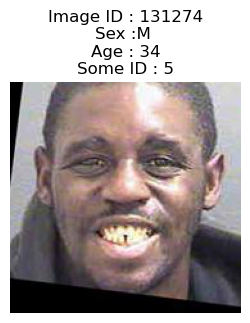

In [56]:
def get_details_from_image_path(image_path):
    img_id, details =  image_path.split('/')[-1].split('.')[0].split('_')
    some_id ,sex,age = details[:-3] , details[-3], int(details[-2:])
    return {'Image ID': img_id, 'sex':sex , 'age':age, 'some_id':some_id} 

def display_image_with_details(image_path):
    img = Image.open(image_path)
    img_id, details =  image_path.split('/')[-1].split('.')[0].split('_')
    some_id ,sex,age = details[:-3] , details[-3], int(details[-2:])
    plt.figure(figsize=(3,3))
    plt.title(f'Image ID : {img_id}\nSex :{sex} \nAge : {age}\nSome ID : {some_id}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

img_idx = random.choice(range(len(train_images_files)))
# df_train[df_train['filename'] == train_images_files[img_idx]]
display_image_with_details(images_folder + types['train'] + '/' + train_images_files[img_idx])

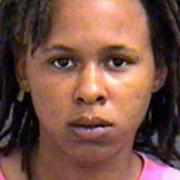

In [88]:
img_path = images_folder + types['train'] + '/' + train_images_files[img_idx]
img = Image.open(img_path)
img

In [89]:
img.size , img.mode , img.getbands() , img.format

((180, 180), 'RGB', ('R', 'G', 'B'), 'JPEG')

In [90]:
'DIMENSIONS : ',img.size[0] * img.size[1] * len(img.getbands())

('DIMENSIONS : ', 97200)

In [97]:
new_dim = 16
img = img.resize((new_dim,new_dim))
img

In [98]:
img_array = np.array(img)
img_array.shape 
'DIMENSIONS : ', np.prod(img_array.shape)

(16, 16, 3)

('DIMENSIONS : ', 768)

> REQUIRED : PCA !

#### Creating Data into arrays 


In [100]:
get_details_from_image_path(train_images_files[img_idx])

{'Image ID': '291285', 'sex': 'M', 'age': 24, 'some_id': '02'}

In [103]:
df_train['gender'].value_counts()

gender
1    34433
0     5579
Name: count, dtype: int64

In [155]:
import datetime


def create_image_dataframe(image_files, images_folder, dim=180):
    # X = []
    # y = []
    details = []
    for image_file in image_files:
        det = get_details_from_image_path(image_file)
        if det['sex'] == 'F':
            continue
        try :
            img = Image.open(images_folder +'/'  + image_file)
            img_array = np.array(img).reshape(-1)
            if img_array.shape[0] != dim*dim*3:
                continue
            # X.append(img_array)
            # y.append(det['age']) 
            det['filename'] = image_file
            details.append(det)
        except Exception as e:
            print(f'Error : {e}')
            print(f'Error in file : {image_file}')
            continue
    # return np.array(X) , np.array(y)
    return pd.DataFrame(details)

# start = datetime.datetime.now()
# image_files_sample = train_images_files
# X_train,y_train = create_image_dataframe(image_files_sample, images_folder + types['train'])
# end  = datetime.datetime.now()
# print(f'Time taken : {end-start}')
# X_train.shape,y_train.shape

start = datetime.datetime.now()
image_files_sample = os.listdir(images_folder + types['train'])
train_details = create_image_dataframe(image_files_sample, images_folder + types['train'])
end  = datetime.datetime.now()
print(f'Time taken : {end-start}')
train_details.shape

Time taken : 0:10:08.499431


(34386, 5)

In [88]:
train_details.head()

,Image ID,sex,age,some_id,filename
0,00013,M,19,00,00013_00M19.JPG
1,00013,M,19,01,00013_01M19.JPG
2,00013,M,19,02,00013_02M19.JPG
3,00022,M,19,03,00022_03M19.JPG
4,00022,M,20,04,00022_04M20.JPG


In [156]:
export_folder = './../Data/MORPH2/'

In [ ]:
np.save( export_folder + 'X_train.npy', X_train)
np.save( export_folder + 'y_train.npy', y_train)

In [157]:
train_details.to_csv( export_folder + 'Train_details.csv',index=False)

In [69]:
train_details['age'].unique()
# sorted(list(train_details['age'].unique()))

array([19, 20, 30, 46, 40, 16, 17, 23, 41, 56, 35, 37, 27, 29, 18, 25, 26,
       38, 34, 50, 51, 22, 39, 28, 44, 54, 42, 31, 60, 43, 62, 49, 36, 21,
       24, 33, 53, 32, 45, 48, 70, 67, 68, 69, 58, 47, 63, 64, 59, 52, 61,
       65, 57, 55, 66, 71, 76, 77], dtype=int64)

<Figure size 1000x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Age Distribution')

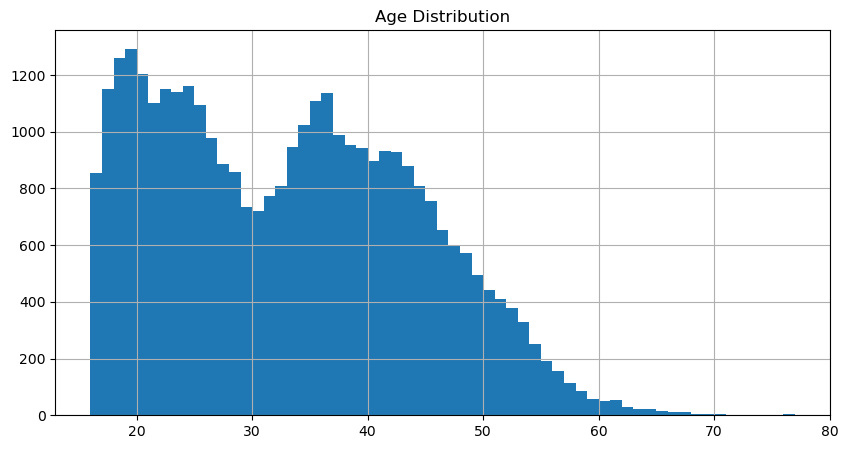

In [73]:
# train_details['age'].value_counts()
plt.figure(figsize=(10,5))
train_details['age'].hist(bins=77-16)
plt.title('Age Distribution')
plt.show()

In [91]:
start = datetime.datetime.now()
val_images_files = os.listdir(images_folder + types['val'])
image_files_sample = val_images_files 
X_val,y_val = create_image_dataframe(image_files_sample, images_folder + types['val']) 
end  = datetime.datetime.now()
print(f'Time taken : {end-start}')

X_val.shape,y_val.shape

ValueError: too many values to unpack (expected 2)

In [158]:
start = datetime.datetime.now()
val_images_files = os.listdir(images_folder + types['val'])
image_files_sample = val_images_files 
val_details = create_image_dataframe(image_files_sample, images_folder + types['val'])
end  = datetime.datetime.now()
print(f'Time taken : {end-start}')

val_details.shape
val_details.head()

Time taken : 0:01:12.512117


(4231, 5)

,Image ID,sex,age,some_id,filename
0,00027,M,30,01,00027_01M30.JPG
1,00073,M,40,01,00073_01M40.JPG
2,0007,M,16,00,0007_00M16.JPG
3,00111,M,40,01,00111_01M40.JPG
4,00260,M,23,03,00260_03M23.JPG


In [126]:
export_folder = './../Data/MORPH2/'
np.save( export_folder + 'X_val.npy', X_val)
np.save( export_folder + 'y_val.npy', y_val)

In [159]:
val_details.to_csv( export_folder + 'Val_details.csv',index=False)

In [124]:
start = datetime.datetime.now()
test_images_files = os.listdir(images_folder + types['test'])
image_files_sample = test_images_files  
X_test,y_test = create_image_dataframe(image_files_sample, images_folder + types['test'])
end  = datetime.datetime.now()
print(f'Time taken : {end-start}')

X_test.shape,y_test.shape

Time taken : 0:00:53.990476


((4261, 97200), (4261,))

In [160]:
start = datetime.datetime.now()
test_images_files = os.listdir(images_folder + types['test'])
image_files_sample = test_images_files  
test_details = create_image_dataframe(image_files_sample, images_folder + types['test'])
end  = datetime.datetime.now()
print(f'Time taken : {end-start}')

test_details.shape 
test_details.head()

Time taken : 0:01:15.465587


(4261, 5)

,Image ID,sex,age,some_id,filename
0,00189,M,18,01,00189_01M18.JPG
1,00242,M,19,06,00242_06M19.JPG
2,00257,M,22,01,00257_01M22.JPG
3,00425,M,20,03,00425_03M20.JPG
4,00559,M,37,02,00559_02M37.JPG


In [125]:
export_folder = './../Data/MORPH2/'
np.save( export_folder + 'X_test.npy', X_test)
np.save( export_folder + 'y_test.npy', y_test)

In [161]:
test_details.to_csv( export_folder + 'Test_details.csv',index=False)

### Load dataset

In [2]:
data_folder = './../Data/MORPH2/'
X_train = np.load(data_folder + 'X_train.npy')
y_train = np.load(data_folder + 'y_train.npy')
X_val = np.load(data_folder + 'X_val.npy')
y_val = np.load(data_folder + 'y_val.npy')
X_test = np.load(data_folder + 'X_test.npy')
y_test = np.load(data_folder + 'y_test.npy')
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((34386, 97200), (34386,), (4231, 97200), (4231,), (4261, 97200), (4261,))

In [8]:
def split_dataset(feats, targs, test_ratio = 0.2):
	n = feats.shape[0]
	test_size = int(n * test_ratio)
	mask = np.random.permutation(n)
	train_mask = mask[test_size:]
	test_mask = mask[:test_size]
	return feats[train_mask],  targs[train_mask], feats[test_mask] , targs[test_mask]

def calculate_corrcoef(original, reconstructed):
	x_bar = np.mean(original)
	y_bar = np.mean(reconstructed)
	num = np.sum((original - x_bar) * (reconstructed - y_bar))
	den = np.sqrt(np.sum((original - x_bar) ** 2) * np.sum((reconstructed - y_bar) ** 2))
	if den == 0:
		return 0
	return num / den

def calculate_mae(original, reconstructed):
	return np.mean(np.abs((original - reconstructed)))

def calculate_mse(original, reconstructed):
	return np.mean((original - reconstructed) ** 2)

def calculate_psnr(original, reconstructed, max_f = 255):
	mse = calculate_mse(original, reconstructed)
	if mse == 0:
		return 100 , mse
	psnr = 10 * np.log10( max_f**2 / mse) 
	return psnr , mse

def calculate_metrics(original, reconstructed):
	mae = calculate_mae(original, reconstructed)
	psnr, mse = calculate_psnr(original, reconstructed)
	return {'MAE' : mae , 'MSE' : mse , 'PSNR' : psnr}

def standardize_data(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std==0] = 1.0
    return X - mu / std , mu

def compute_pca_eigen(X, n_components):
	covariance_matrix = np.cov(X, rowvar=False)
	e_val, e_vec = np.linalg.eigh(covariance_matrix)
	e_sum = np.sum(e_val)

	mask = np.argsort(-e_val)
	e_val = e_val[mask]
	e_vec = e_vec[:, mask]
	
	principal_components = e_vec[:, :n_components]
	explained_variance = e_val[:n_components] / e_sum
	
	return principal_components , explained_variance

def reconstruct_images(X, components, mean):
	return np.dot(np.dot(X - mean, components), components.T) + mean

def plot_sample_compare(images_flat,reconstructed,n_components = None , Test_or_Train = None ,shape = (28,28),fixed_img  =None):
	if fixed_img :
		img = fixed_img
	else:
		img = np.random.choice(images_flat.shape[0])
	fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
	axes[0].imshow(images_flat[img].reshape(shape) ,cmap='gray')
	axes[0].set_title('Original')
	axes[0].axis('off')
	axes[1].imshow(reconstructed[img].reshape(shape), cmap='gray')
	axes[1].set_title('Constructed')
	axes[1].axis('off')
	plt.axis('off')
	if n_components:
		fig.suptitle( str(Test_or_Train) + ' $N_{components}$ = ' + str(n_components))
		
def PCA(train_images , test_images ,n_components,plt = None ,shape = (28,28),fixed_img = None):
	train_centered, train_mean = standardize_data(train_images)
	test_centered, test_mean = standardize_data(test_images)
	principal_components, var = compute_pca_eigen(train_centered, n_components)
	
	explained_var = var #/ np.sum(var) 

	train_reconstructed = reconstruct_images(train_centered, principal_components, train_mean)
	test_reconstructed = reconstruct_images(test_centered, principal_components,test_mean)
	if plt :
		plot_sample_compare(train_images,train_reconstructed,n_components,'Train Data : ',shape, fixed_img =fixed_img )
		plot_sample_compare(test_images,test_reconstructed,n_components,'Test Data : ',shape,fixed_img =fixed_img  )
	
	return train_reconstructed, test_reconstructed, explained_var

""" OPTIONAL ARGUMENTS :: (useage) 
	channels = say graysclae, then it is 1
				if Coloured as RGB then 3 channels
				if COloured as RGBA with alpha channel as well  then 4 
				and supports n channel as well
	shape = shape of each channel
"""
def PCA_Layered(train_data , test_data, n_components = 100, channels = 3,shape = (32,32) , plt = False,fixed_img = None):
	train_reconstructed_layers = []
	test_reconstructed_layers = []
	var_reconstructed_layers = []
	for i in range(channels):
		train_data_channel = train_data[: , i*shape[0]*shape[1]:(i+1)*shape[0]*shape[1]]
		test_data_channel = test_data[: , i*shape[0]*shape[1]:(i+1)*shape[0]*shape[1]]
		train_recons_l ,test_recons_l ,var_recons_l = PCA( train_data_channel , test_data_channel , n_components  ,plt = False ,shape = shape )
		train_reconstructed_layers.append(train_recons_l.astype('uint8'))
		test_reconstructed_layers.append(test_recons_l.astype('uint8'))
		var_reconstructed_layers.append(var_recons_l)

	train_reconstructed = np.hstack(train_reconstructed_layers)
	test_reconstructed = np.hstack(test_reconstructed_layers)
	if plt :
		plot_sample_compare_colour(train_data,train_reconstructed,n_components,'Train Data : ',fixed_img=fixed_img )
		plot_sample_compare_colour(test_data,test_reconstructed,n_components,'Test Data : ' , fixed_img=fixed_img )
	return train_reconstructed, test_reconstructed, var_recons_l 


def PCA_reduce(train_images, test_images, n_components):
    train_centered, train_mean = standardize_data(train_images)
    test_centered, test_mean = standardize_data(test_images)
    principal_components, var = compute_pca_eigen(train_centered, n_components)
    train_reduced = np.dot(train_centered, principal_components)
    test_reduced = np.dot(test_centered, principal_components)  

    return train_reduced, test_reduced

def PCA_Layered(train_data , test_data, n_components = 100, channels = 3,shape = (32,32) , plt = False,fixed_img = None):
	train_reconstructed_layers = []
	test_reconstructed_layers = []
	var_reconstructed_layers = []
	for i in range(channels):
		train_data_channel = train_data[: , i*shape[0]*shape[1]:(i+1)*shape[0]*shape[1]]
		test_data_channel = test_data[: , i*shape[0]*shape[1]:(i+1)*shape[0]*shape[1]]
		train_recons_l ,test_recons_l ,var_recons_l = PCA( train_data_channel , test_data_channel , n_components  ,plt = False ,shape = shape )
		train_reconstructed_layers.append(train_recons_l.astype('uint8'))
		test_reconstructed_layers.append(test_recons_l.astype('uint8'))
		var_reconstructed_layers.append(var_recons_l)

	train_reconstructed = np.hstack(train_reconstructed_layers)
	test_reconstructed = np.hstack(test_reconstructed_layers)
	if plt :
		plot_sample_compare_colour(train_data,train_reconstructed,n_components,'Train Data : ',fixed_img=fixed_img )
		plot_sample_compare_colour(test_data,test_reconstructed,n_components,'Test Data : ' , fixed_img=fixed_img )
	return train_reconstructed, test_reconstructed, var_recons_l 


def plot_sample_compare_colour(images_flat, reconstructed, n_components = None , Test_or_Train = None,fixed_img = None, dim = 180):
	if fixed_img:
		img = fixed_img
	else:
		img = np.random.choice(images_flat.shape[0])

	fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
	axes[0].imshow(images_flat[img].reshape(3, dim, dim).transpose(1,2, 0))
	axes[0].set_title('Original')
	axes[0].axis('off')
	axes[1].imshow(reconstructed[img].reshape(3, dim, dim).transpose(1,2, 0))
	axes[1].set_title('Constructed')
	axes[1].axis('off')
	plt.axis('off')
	if n_components:
		fig.suptitle( str(Test_or_Train) + ' $N_{components}$ = ' + str(n_components))

' OPTIONAL ARGUMENTS :: (useage) \n\tchannels = say graysclae, then it is 1\n\t\t\t\tif Coloured as RGB then 3 channels\n\t\t\t\tif COloured as RGBA with alpha channel as well  then 4 \n\t\t\t\tand supports n channel as well\n\tshape = shape of each channel\n'

In [10]:
# dim = 180
# X_n_components = 16*16*3
# n_data_points = 1000
# X_train_reconstructed, X_test_reconstructed, X_variance = PCA_Layered(X_test[:n_data_points], X_val[:n_data_points], X_n_components,channels= 3,shape=(dim,dim),plt=False)
# plot_sample_compare_colour(X_test[:n_data_points], X_train_reconstructed , X_n_components ,"Test")
# plot_sample_compare_colour(X_val[:n_data_points], X_test_reconstructed , X_n_components ,"Val")

In [31]:
from sklearn.decomposition import PCA

n_components = 100
start = datetime.datetime.now()
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(X_test)
end = datetime.datetime.now()
print(f'Time taken : {end-start}')

Time taken : 0:00:32.272412


In [32]:
data_reduced.shape

(4261, 100)

In [33]:
# pca.fit(X_val)
pca.transform(X_val).shape

(4231, 100)

In [34]:
pca.transform(X_train[:200]).shape

(200, 100)

In [35]:
print("Explained variance ratio:", pca.explained_variance_ratio_.shape)
print("variance retained : ", np.sum(pca.explained_variance_ratio_[:n_components]))
print("Reduced data shape:", data_reduced.shape)

Explained variance ratio: (100,)
variance retained :  0.852188900312682
Reduced data shape: (4261, 100)


In [17]:
n_components = [50,  100, 250, 500, 1000, 2000] 

In [ ]:
variances_retained = []
time_taken = []

for n in n_components:
    start = datetime.datetime.now()
    pca = PCA(n_components=n)
    data_reduced = pca.fit_transform(X_test)
    variances_retained.append(np.sum(pca.explained_variance_ratio_))
    end = datetime.datetime.now()
    time_taken.append((end-start).total_seconds())

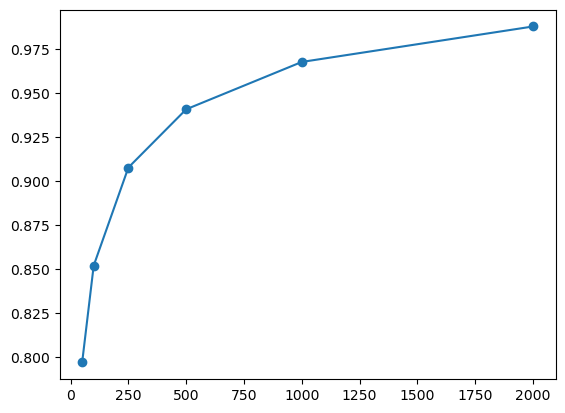

In [18]:
plt.plot(n_components, variances_retained, marker='o')

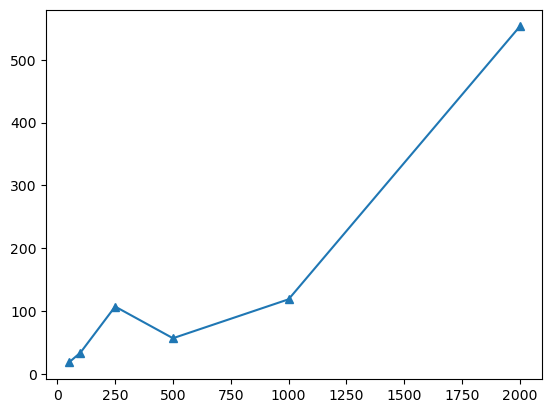

In [19]:
plt.plot(n_components, time_taken, marker='^')

In [11]:
# dim = 180
# X_n_components = 16*16*3
# X_train_reconstructed, X_test_reconstructed, X_variance = PCA_Layered(X_train, X_test,X_n_components,channels= 3,shape=(dim,dim),plt=False) 
# print(X_variance)
# plot_sample_compare_colour(X_train, X_train_reconstructed , X_n_components ,"Train")
# plot_sample_compare_colour(X_test, X_test_reconstructed , X_n_components ,"Test")

#### PCA with 3 x 16 x 16

In [36]:
save_pca_folder = './../Data/MORPH2/PCA/'

In [37]:
from sklearn.decomposition import PCA
n_components = 3 * 16 * 16 


start = datetime.datetime.now()
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
end = datetime.datetime.now()
print(f'Train fit - Time taken : {end-start}')

Train fit - Time taken : 0:25:09.246309


In [38]:
np.save(save_pca_folder + 'X_train_pca.npy', X_train_pca)

In [39]:
start = datetime.datetime.now()
X_test_pca = pca.transform(X_test)
end =  datetime.datetime.now()
print(f'Test transform - Time taken : {end-start}')

Test transform - Time taken : 0:00:06.958300


In [40]:
np.save(save_pca_folder + 'X_test_pca.npy', X_test_pca)

In [41]:
start = datetime.datetime.now()
X_val_pca = pca.transform(X_val)
end =  datetime.datetime.now()
print(f'Val transform - Time taken : {end-start}')

Val transform - Time taken : 0:00:06.337387


In [43]:
np.save(save_pca_folder + 'X_val_pca.npy', X_val_pca)

In [164]:
import pickle 

with open(save_pca_folder + "pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

## Load MORPH 2 PCAed Dataset

In [96]:
data_folder = './../Data/MORPH2/'
data_folder_pca = './../Data/MORPH2/PCA/'
data_folder = './../Data/MORPH2/'

X_train = np.load(data_folder + 'X_train.npy')
X_val = np.load(data_folder + 'X_val.npy')
X_test = np.load(data_folder + 'X_test.npy')
X_train_pca = np.load(data_folder_pca + 'X_train_pca.npy')
X_val_pca = np.load(data_folder_pca + 'X_val_pca.npy')
X_test_pca = np.load(data_folder_pca + 'X_test_pca.npy')
y_train = np.load(data_folder + 'y_train.npy')
y_val = np.load(data_folder + 'y_val.npy')
y_test = np.load(data_folder + 'y_test.npy')

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
X_train_pca.shape, X_val_pca.shape, X_test_pca.shape

((34386, 97200), (34386,), (4231, 97200), (4231,), (4261, 97200), (4261,))

((34386, 768), (4231, 768), (4261, 768))

In [ ]:
import pickle 
with open("pca_model.pkl", "rb") as f:
    pca = pickle.load(f)

# transformed_images = pca.transform([img_array])

In [97]:
types = {'train' : 'Train', 'test' : 'Test' , 'val' : 'Validation'}
images_folder = './../Data/MORPH2/Dataset/Images/'

In [168]:
train_details = pd.read_csv(data_folder + 'Train_details.csv')
train_details['type'] = types['train']
val_details = pd.read_csv(data_folder + 'Val_details.csv')
val_details['type'] = types['val']
test_details = pd.read_csv(data_folder + 'Test_details.csv')
test_details['type'] = types['test']
df = pd.concat([train_details, val_details, test_details]) 
df.shape

(42878, 6)

<Axes: >

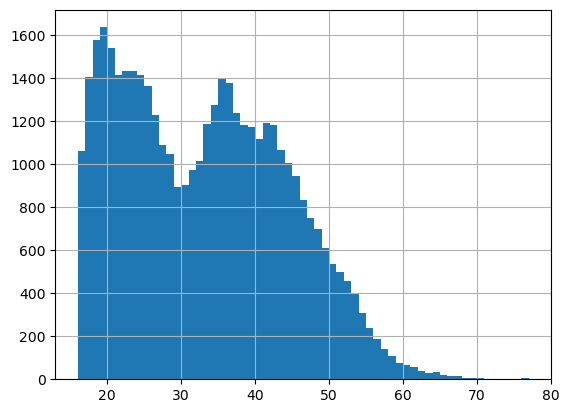

In [102]:
df.age.hist(bins=max(df.age) - min(df.age))

In [104]:
df.head()

,Image ID,sex,age,some_id,filename,type
0,13,M,19,0,00013_00M19.JPG,Train
1,13,M,19,1,00013_01M19.JPG,Train
2,13,M,19,2,00013_02M19.JPG,Train
3,22,M,19,3,00022_03M19.JPG,Train
4,22,M,20,4,00022_04M20.JPG,Train


In [169]:
train_details.shape, X_train_pca.shape
val_details.shape, X_val_pca.shape
test_details.shape, X_test_pca.shape

((34386, 6), (34386, 768))

((4231, 6), (4231, 768))

((4261, 6), (4261, 768))

In [165]:
train_details.head()

,Image ID,sex,age,some_id,filename
0,00013,M,19,00,00013_00M19.JPG
1,00013,M,19,01,00013_01M19.JPG
2,00013,M,19,02,00013_02M19.JPG
3,00022,M,19,03,00022_03M19.JPG
4,00022,M,20,04,00022_04M20.JPG


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-53.53006795293422..272.5539411062076].


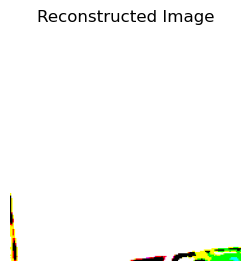

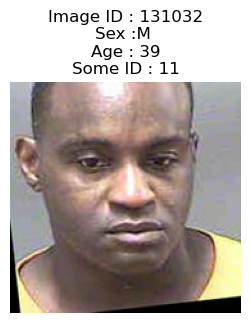

In [268]:
img_idx = random.choice(range(len(train_details)))
img_path = images_folder + train_details['type'].iloc[img_idx] + '/' + train_details['filename'].iloc[img_idx]
recons_img_idx = pca.inverse_transform([X_train_pca[img_idx]])
# pca_img = X_train_pca[img_idx].reshape(16,16,-1)
pca_img = recons_img_idx.reshape(180,180,-1)
_= plt.figure(figsize=(3,3))
_= plt.title('Reconstructed Image')
_= plt.imshow(pca_img)
_= plt.axis('off')
display_image_with_details(img_path)

In [163]:
pca.n_components

768

## Quick Linear Regress test

In [209]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(X_train_pca, y_train)    

LinearRegression()

In [213]:
y_pred = lr.predict(X_test_pca)
y_pred[:10]

array([35.77535842, 23.26111238, 20.84836028, 25.85810824, 42.62610084,
       20.17952927, 33.7995525 , 31.21439914, 38.85755535, 49.193441  ])

In [217]:
loss = np.mean((y_pred - y_test)**2)
loss

39.45922006463959

39.45922006463959

In [222]:
y_pred_ints = np.round(y_pred).astype(int)
y_pred_ints[:10]

array([36, 23, 21, 26, 43, 20, 34, 31, 39, 49])

In [223]:
acc = np.mean(y_pred_ints == y_test)
acc 

0.06805914104670265

In [230]:
acc = np.mean(np.abs(y_pred_ints - y_test) <= 5) 
acc 

0.623093170617226

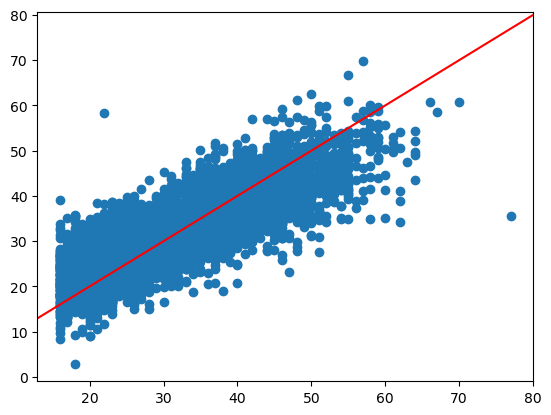

In [235]:
plt.scatter(y_test, y_pred)
plt.axline([np.min(y_test), np.min(y_test)],[ np.max(y_test), np.max(y_test)], color='red')